In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import math as mt


trips=pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff=pd.read_csv('/datasets/project_sql_result_04.csv')

Começamos importando as tabelas solicitadas e tirando as primeiras impressões dos dados. 

In [2]:
trips

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [3]:
trips.head(15)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [4]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
trips.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [6]:
soma1 = trips['trips_amount'].sum()
trips['trips_amount_part'] = trips['trips_amount'] / soma1

In [7]:
trips['trips_amount_part'].head(15).sum()

0.855248304942794

In [8]:
dropoff

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [9]:
dropoff.head(15)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [10]:
soma = dropoff['average_trips'].sum()

In [11]:
dropoff['average_trips_part'] = dropoff['average_trips'] / soma

In [12]:
dropoff['average_trips_part'].head(15).sum()

0.8557693063501557

In [13]:
dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
 2   average_trips_part     94 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.3+ KB


In [14]:
dropoff.describe()

,average_trips,average_trips_part
count,94.000000,94.000000
mean,599.953728,0.010638
std,1714.591098,0.030403
min,1.800000,0.000032
25%,14.266667,0.000253
50%,52.016667,0.000922
75%,298.858333,0.005299
max,10727.466667,0.190218


Após verificar, não encontrei valores nulos nas tabelas e os tipos de dados estão corretos, não exigindo nenhum tipo de tratamento. 

Abaixo identifiquei os 10 principais bairros em termos de destinos:

In [15]:
top_bairros =  dropoff.sort_values(by='average_trips', ascending = False).head(10)
top_bairros

,dropoff_location_name,average_trips,average_trips_part
0,Loop,10727.466667,0.190218
1,River North,9523.666667,0.168872
2,Streeterville,6664.666667,0.118177
3,West Loop,5163.666667,0.091561
4,O'Hare,2546.900000,0.045161
5,Lake View,2420.966667,0.042928
6,Grant Park,2068.533333,0.036679
7,Museum Campus,1510.000000,0.026775
8,Gold Coast,1364.233333,0.024190
9,Sheffield & DePaul,1259.766667,0.022338


Abaixo gerei os gráficos solicitados para uma melhor visualização dos dados nas tabelas. 

Text(0.5, 1.0, 'Top 10 Bairros onde as corridas terminaram')

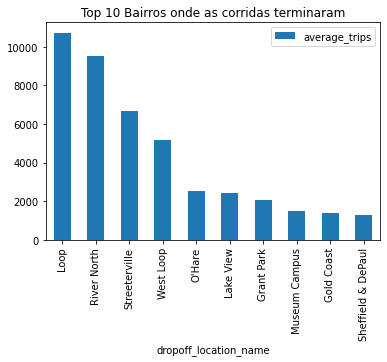

In [16]:

top_bairros.pivot_table(index='dropoff_location_name', values='average_trips', aggfunc='sum').sort_values(by='average_trips', ascending = False).plot(kind='bar')
plt.title('Top 10 Bairros onde as corridas terminaram')

Análise da ditribuição da média de corridas por bairros de Chicago

<AxesSubplot:>

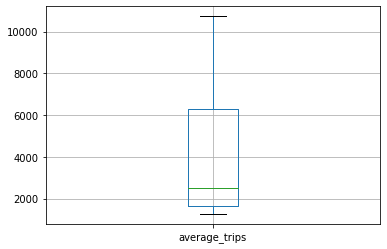

In [17]:
top_bairros.boxplot('average_trips')

array([[<AxesSubplot:title={'center':'average_trips'}>]], dtype=object)

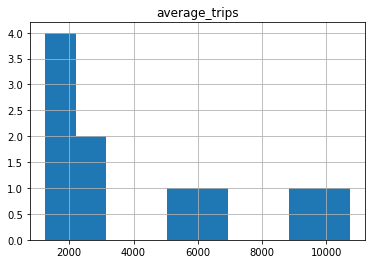

In [18]:
top_bairros.hist('average_trips')

Análise da ditribuição do número de corridas por cada empresa 

<AxesSubplot:>

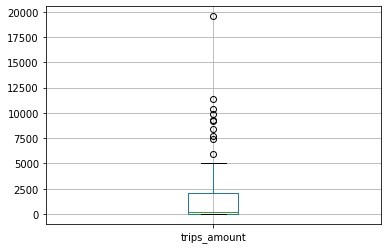

In [19]:
trips.boxplot('trips_amount')

array([[<AxesSubplot:title={'center':'trips_amount'}>]], dtype=object)

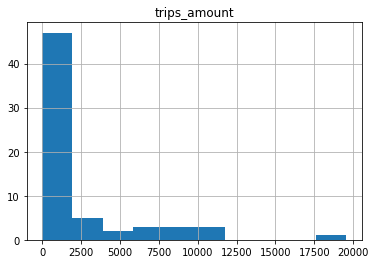

In [20]:
trips.hist('trips_amount')

Text(0.5, 1.0, 'Quantidade de corridas por Empresa')

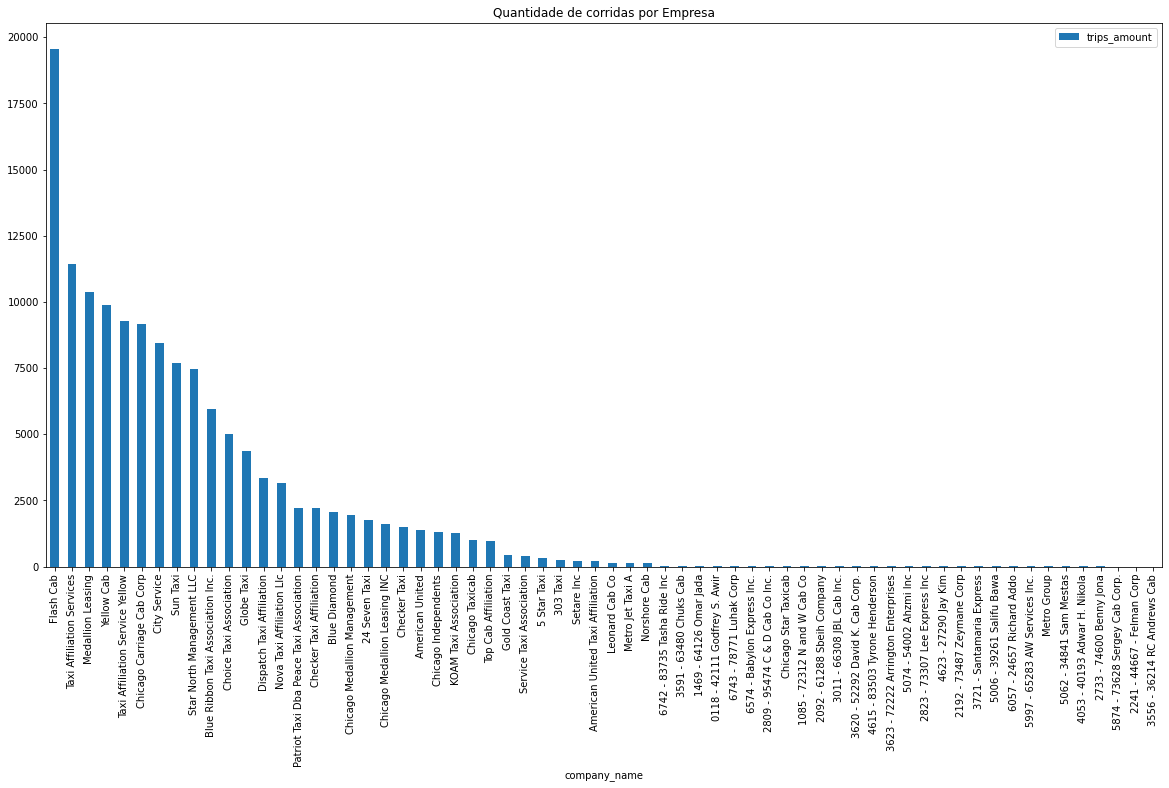

In [21]:
trips.pivot_table(index='company_name', values='trips_amount', aggfunc='sum').sort_values(by='trips_amount', ascending = False).plot(kind='bar',figsize = (20,10))
plt.title('Quantidade de corridas por Empresa')

Text(0.5, 1.0, 'Quantidade de corridas das top 20 Empresa')

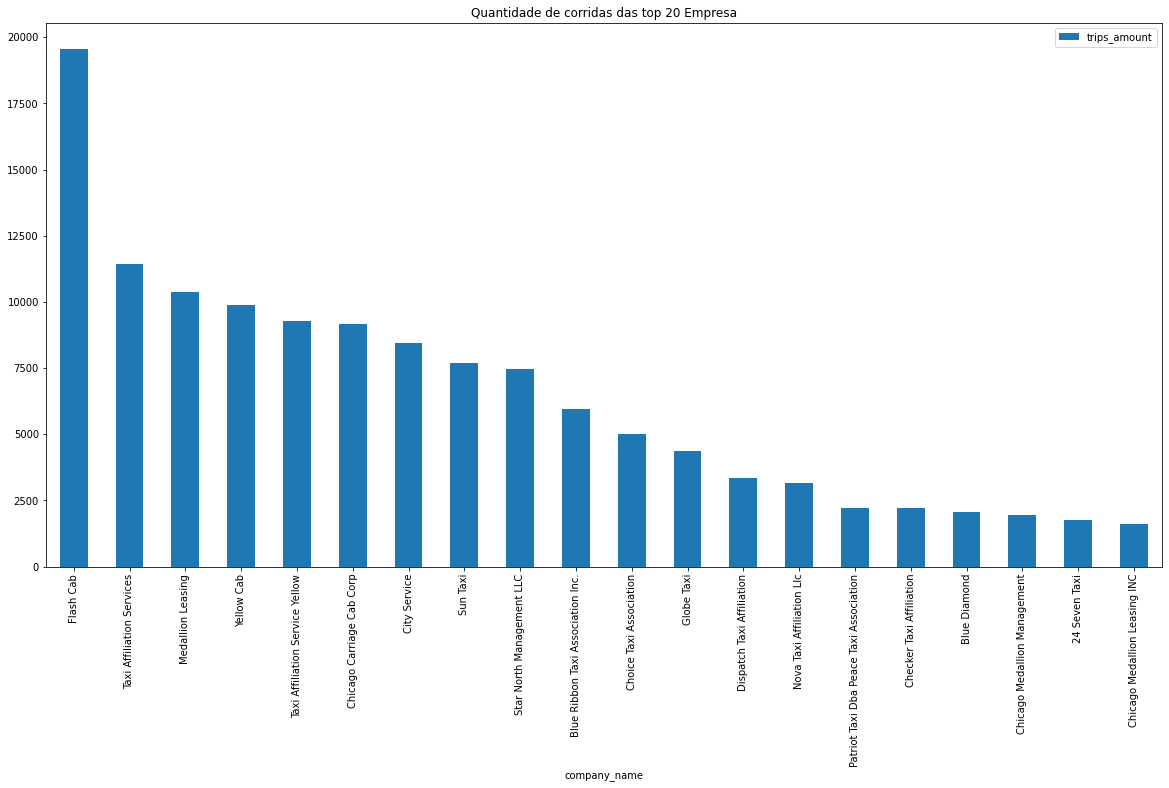

In [22]:
trips.head(20).pivot_table(index='company_name', values='trips_amount', aggfunc='sum').sort_values(by='trips_amount', ascending = False).plot(kind='bar',figsize = (20,10))
plt.title('Quantidade de corridas das top 20 Empresa')

Após gerar e analisar cada gráfico ficou claro a concentração do número de corridas nas principais empresas no período analisado. Já que 85% das corridas foram realizadas pelas 15 maiores empresas. A empresa Flash Cab é disparada a que realizou um maior número de corridas. Também houve concentração nos 15 principais bairros onde as corridas terminaram. 85% do número médio de viagens terminaram nesses bairros. Os bairros Loop e River North destacaram-se com a maiores medias de corridas finalizadas. Há um indício de que são bairros centrais e importantes na cidade de Chicago. 


In [23]:
ohare=pd.read_csv('/datasets/project_sql_result_07.csv')

In [24]:
ohare

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [25]:
ohare.query('weather_conditions == "Good"')

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1062,2017-11-11 06:00:00,Good,1500.0
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0


In [26]:
ohare_good = ohare[ohare['weather_conditions']=='Good']
ohare_good_duration_seconds = ohare_good['duration_seconds']
ohare_good_duration_seconds

0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1062    1500.0
1063       0.0
1064    1318.0
1065    2100.0
1066    1380.0
Name: duration_seconds, Length: 888, dtype: float64

In [27]:
ohare_bad = ohare[ohare['weather_conditions']=='Bad']
ohare_bad_duration_seconds = ohare_bad['duration_seconds']
ohare_bad_duration_seconds

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 180, dtype: float64

Vamos testar a hipótese que a duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos. Minha hipótese nula H0 é de que as médias das duas amostras são iguais. Nesse caso a duração média não seria afetada pelas condições climáticas. Já a hipótese alternativa H1 é de que as médias são diferentes, logo a duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.

In [28]:
alpha = 0.05

In [29]:
th= st.ttest_ind(ohare_good_duration_seconds,ohare_bad_duration_seconds)

In [30]:
th.pvalue

6.517970327099473e-12

In [31]:
if th.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula") 

Rejeitamos a hipótese nula


Rejeitamos a hipótese nula, com alpha 0.05, de que as durações médias dos passeios do Loop para o Aeroporto Internacional O'Hare não mudam nos sábados chuvosos. Chegamos a essa conclusão pois após fazermos o teste t entre as amostras, o p-valor ficou abaixo do alpha. Logo a probabilidade de a hipótese nula ser verdadeira é muito baixa. Assim aceitamos a hipótese alternativa de que a duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.




<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Você programa bem. Fez um bom trabalho.

Como sugestão, você pode ser detalhar mais o projeto, apresentar interpretações sobre os gráficos, documentar o que você pretende fazer. Eu pude compreender pois já corrigi esse projeto outras vezes, mas o projeto como um todo está muito seco. Veja o kernel como um registro de uma pesquisa, passos, justificativas, suposições feitas que vão permitir outro colega entender seu raciocínio, reproduzir seus passos e chegar no mesmo resultado.
</div>
